## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal:

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Reading Data

In [4]:
# Load Training Dataset

hf=pd.read_csv('train.csv')
hf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking the data types, shapes, etc

hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Correcting Data Types

hf[["MSSubClass","OverallQual","OverallCond","GarageYrBlt","MoSold","YrSold"]]=hf[["MSSubClass","OverallQual","OverallCond","GarageYrBlt","MoSold","YrSold"]].astype(object)
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [8]:
# Imputing Missing Values

hf.MasVnrType.fillna('None',inplace=True)
hf.MasVnrArea.fillna(hf.MasVnrArea.mean(),inplace=True)
hf.BsmtQual.fillna('TA',inplace=True)
hf.BsmtCond.fillna('TA',inplace=True)
hf.BsmtExposure.fillna('No',inplace=True)
hf.BsmtFinType1.fillna('Unf',inplace=True)
hf.BsmtFinType2.fillna('Unf',inplace=True)
hf.GarageType.fillna('Attchd',inplace=True)
hf.GarageFinish.fillna('Unf',inplace=True)
hf.GarageQual.fillna('TA',inplace=True)
hf.GarageCond.fillna('TA',inplace=True)

In [9]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [10]:
# Mapping string values to categorical columns

hf['LandSlope'] = hf.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
hf['ExterQual'] = hf.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hf['BsmtQual'] = hf.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hf['BsmtCond'] = hf.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hf['BsmtExposure'] = hf.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
hf['BsmtFinType1'] = hf.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
hf['BsmtFinType2'] = hf.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
hf['HeatingQC'] = hf.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hf['CentralAir'] = hf.CentralAir.map({'N':0,'Y':1})
hf['KitchenQual'] = hf.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hf['GarageFinish'] = hf.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
hf['GarageQual'] = hf.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hf['GarageCond'] = hf.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
hf['ExterCond'] = hf.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
hf['LotShape'] = hf.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
hf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# show the percentage of missing values in the remaining columns

percent_missing = hf.isnull().sum() * 100 / len(hf)
missing_value_df = pd.DataFrame({'column_name': hf.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
ExterQual,ExterQual,0.000000
MasVnrArea,MasVnrArea,0.000000
MasVnrType,MasVnrType,0.000000
Exterior2nd,Exterior2nd,0.000000


In [12]:
# Replacing NA values with 0

hf['LotFrontage'].fillna('0', inplace = True)

In [13]:
# Dropping Columns which have exceeded 10% threshold

hf.drop(["Id","PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1,inplace=True)

In [14]:
hf.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,3,Lvl,AllPub,Inside,0,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,3,Lvl,AllPub,FR2,0,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,0,Lvl,AllPub,Inside,0,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,0,Lvl,AllPub,Corner,0,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,0,Lvl,AllPub,FR2,0,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
hf.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [16]:
hf.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
# Street and Utilities have low variance thus they won't provide any value to the Model

hf.drop(["Street"],axis=1,inplace=True)
hf.drop(["Utilities"],axis=1,inplace=True)

In [18]:
missing=hf.isnull().sum()
missing[missing>0]

Electrical      1
GarageYrBlt    81
dtype: int64

In [19]:
hf.fillna("0",inplace=True)

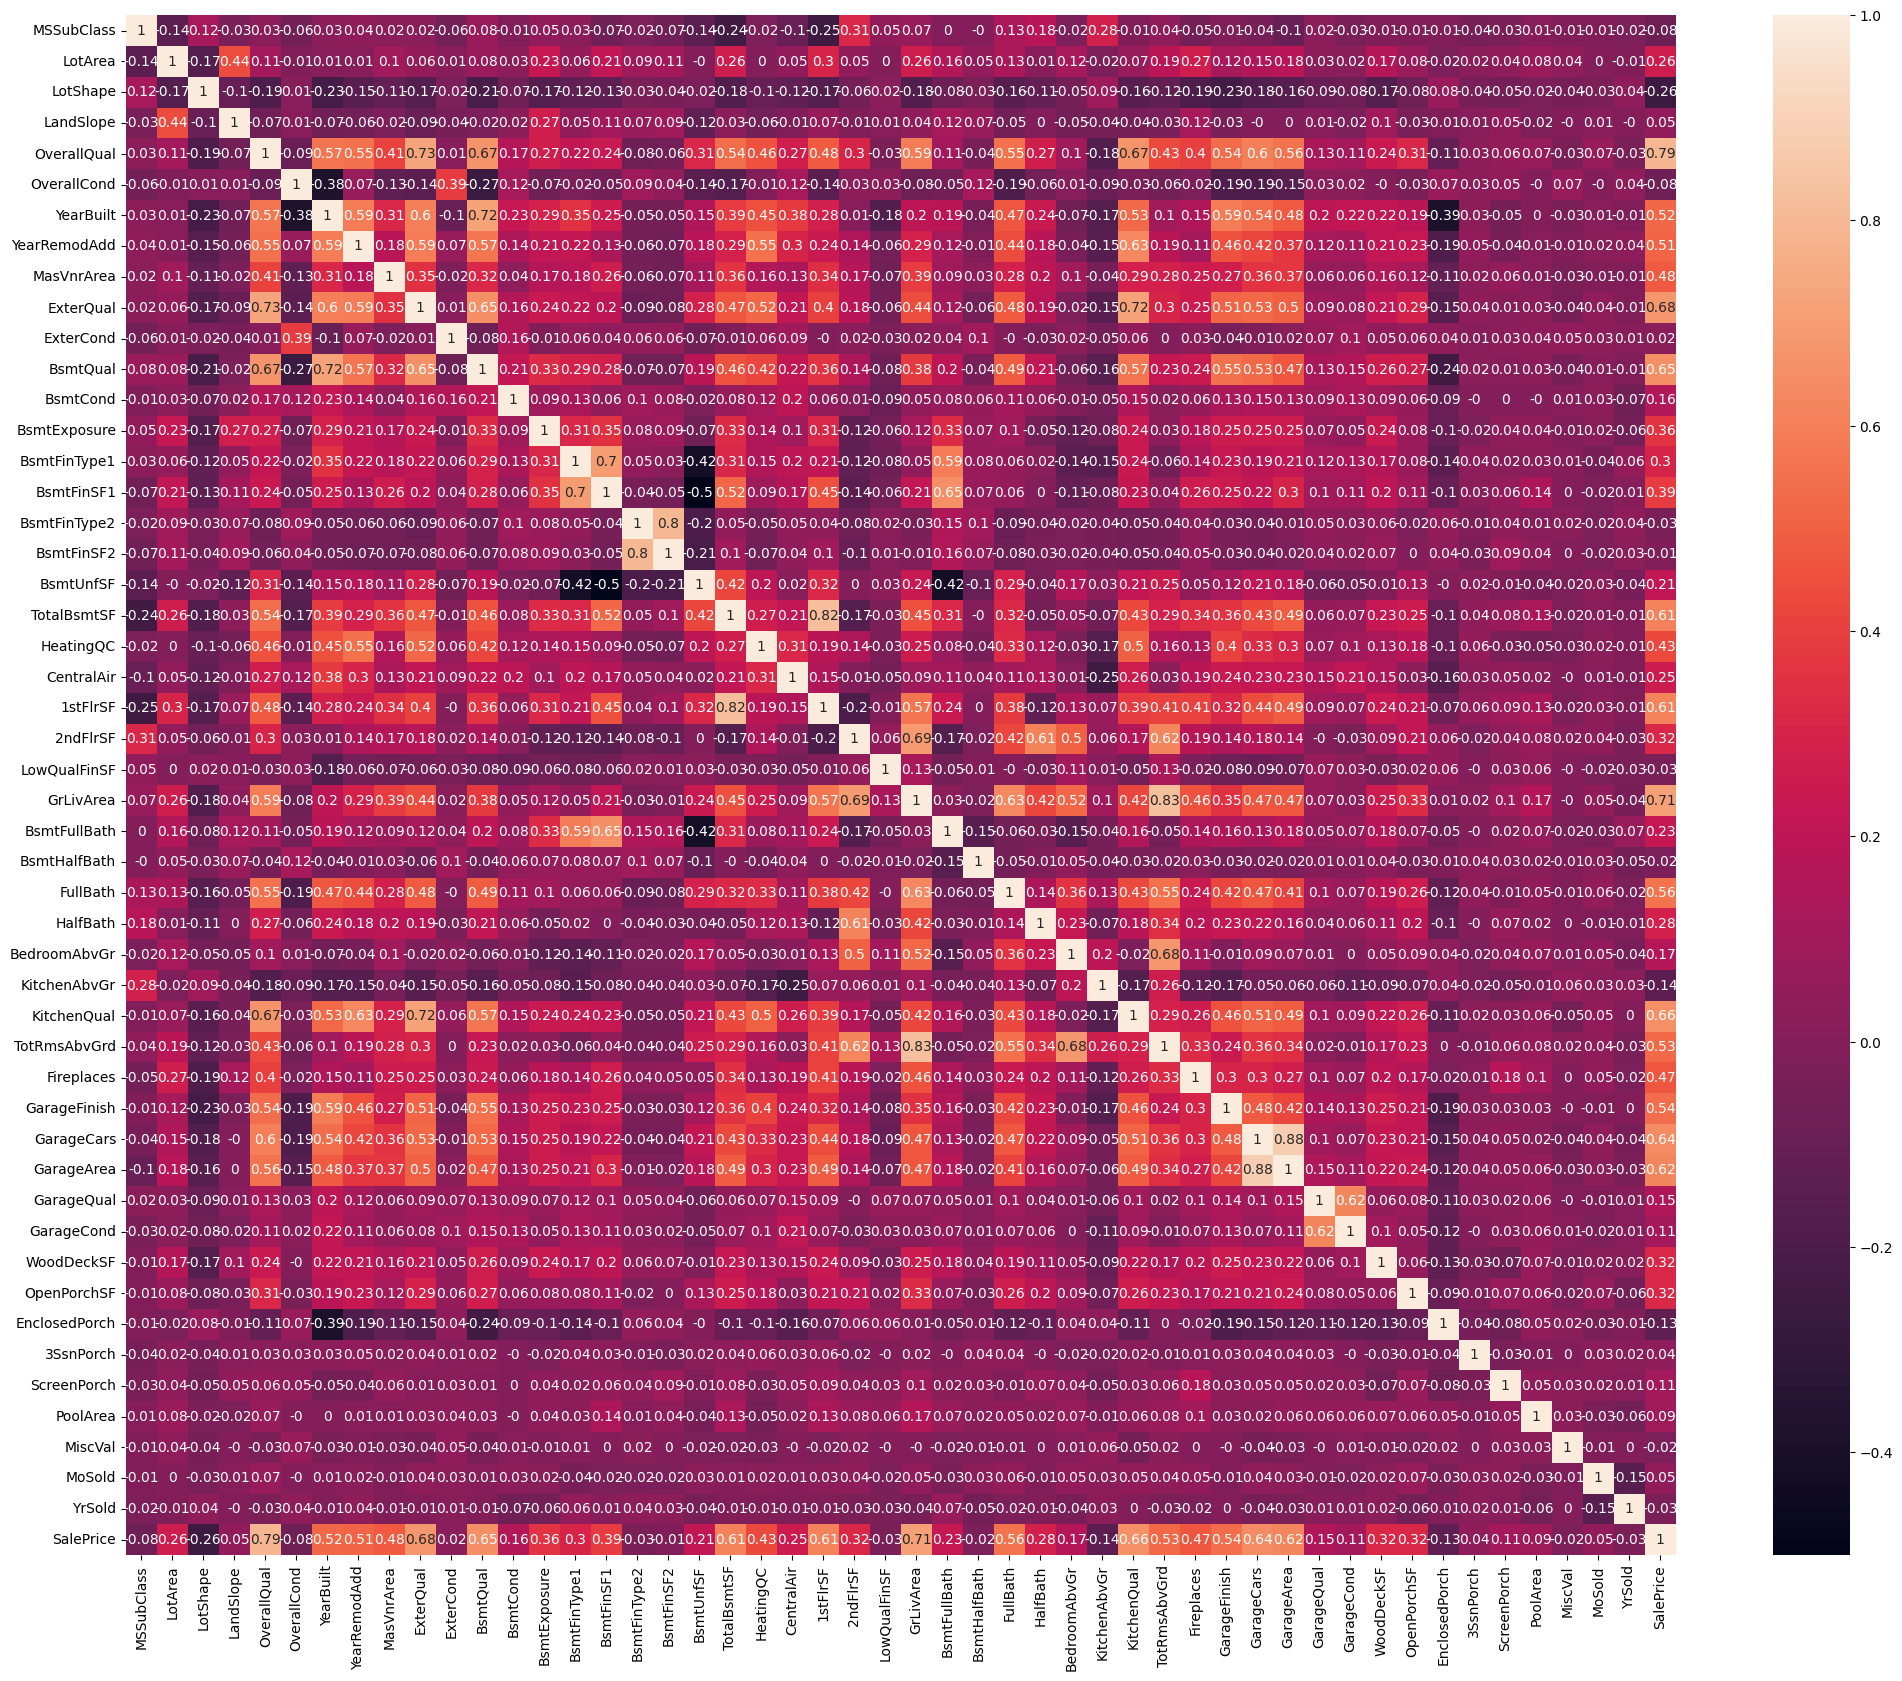

In [20]:
# Check correlations between numerical variables
corrmat=hf.corr()
plt.figure(figsize=(25,20))
sns.heatmap(round(hf.corr(),2),annot=True)
plt.show()

### Let us plot the graphs between some of these important numerical variables and see if we see any pattern


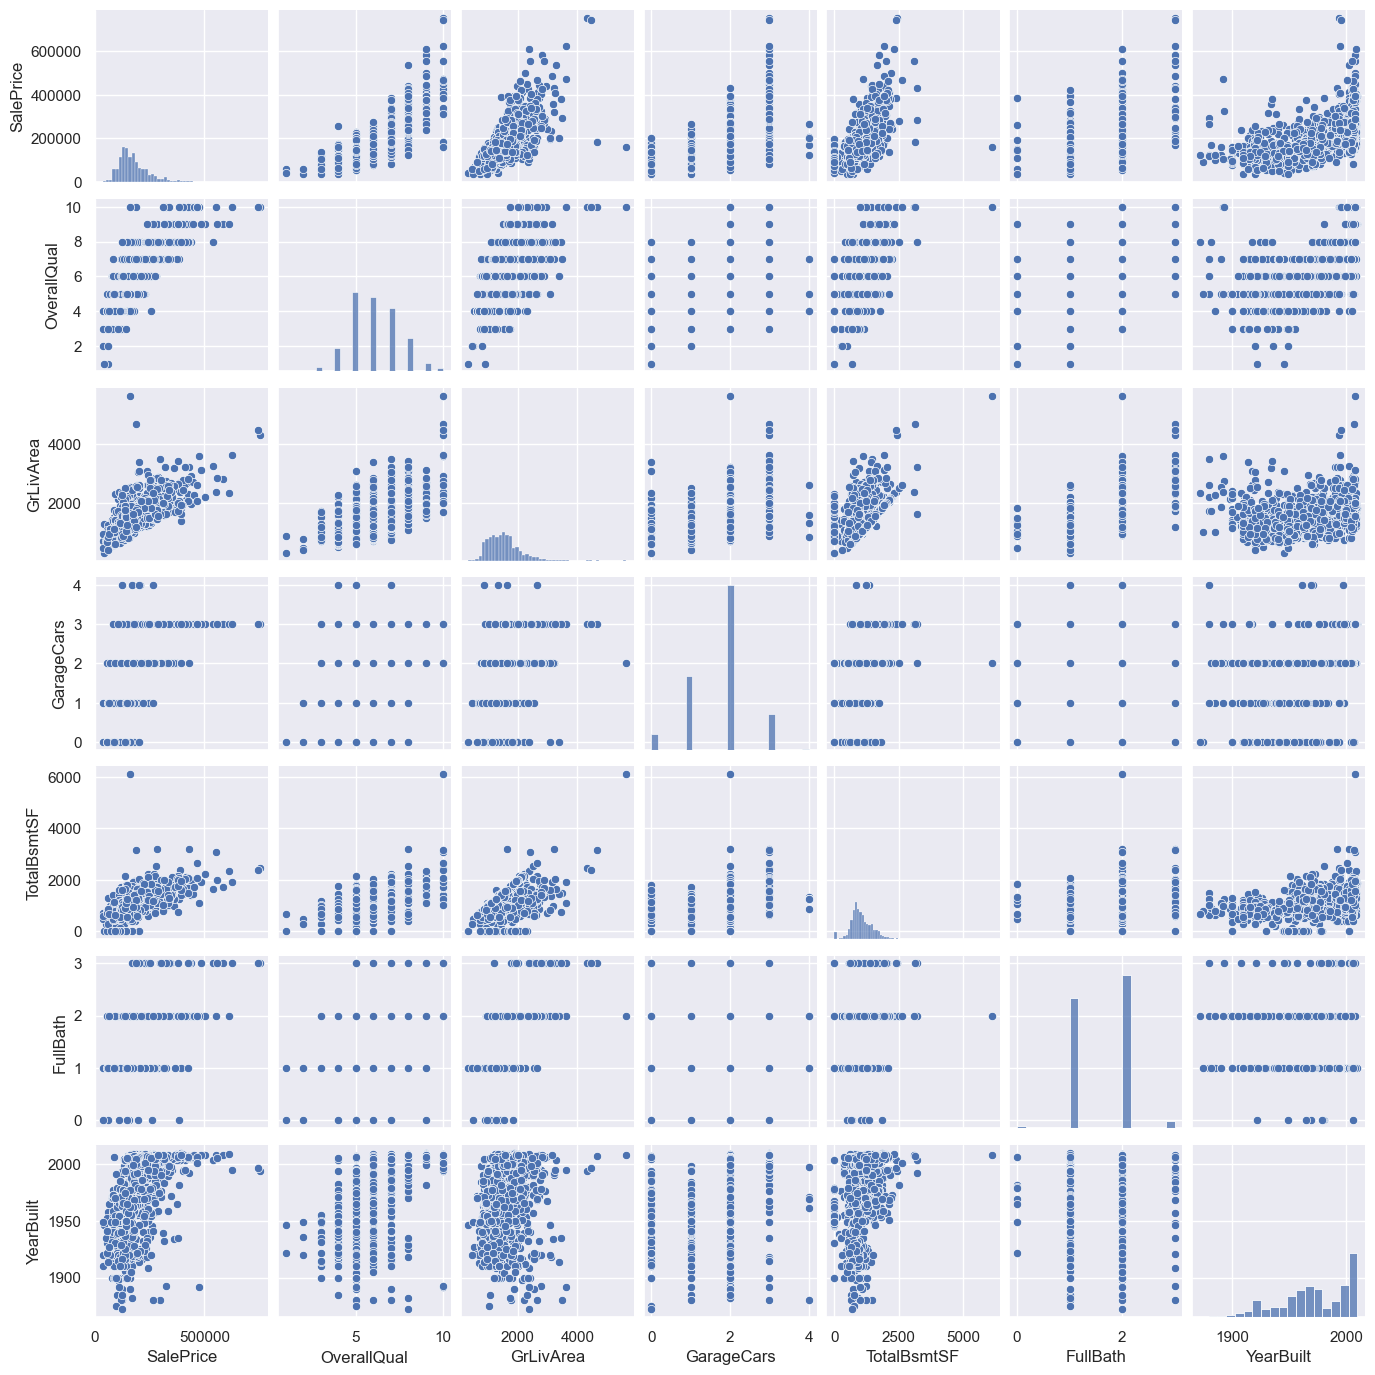

In [21]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(hf[cols],height = 2)
plt.show()

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

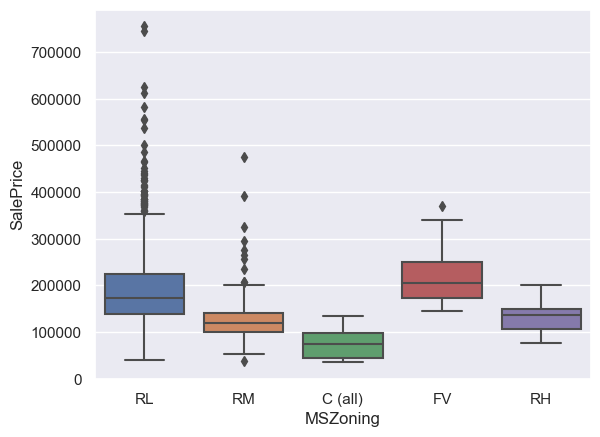

In [22]:
sns.boxplot(data=hf,x="MSZoning",y="SalePrice")

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

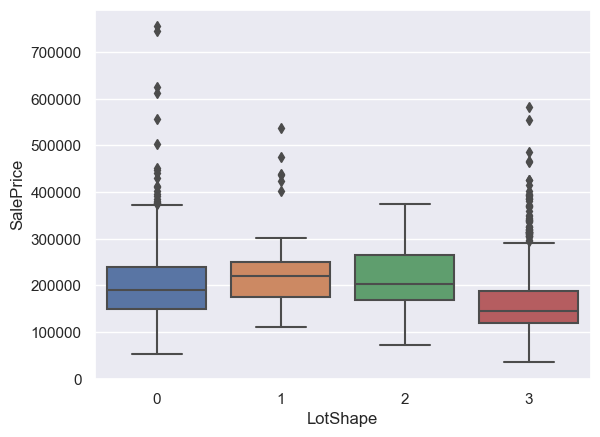

In [23]:
sns.boxplot(data=hf,x="LotShape",y="SalePrice")

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

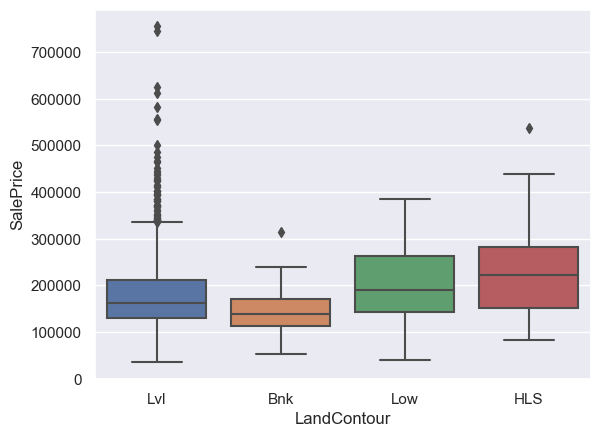

In [24]:
sns.boxplot(data=hf,x="LandContour",y="SalePrice")

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

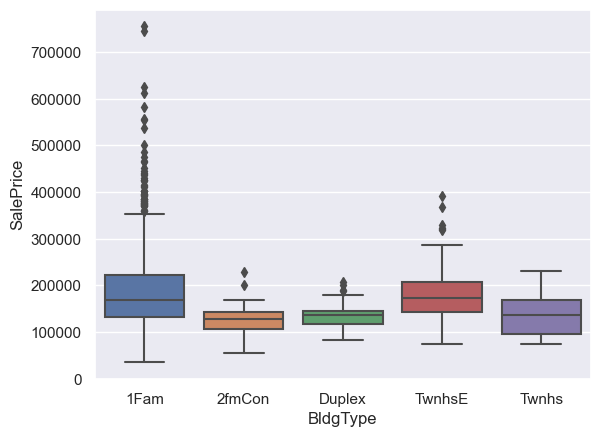

In [25]:
sns.boxplot(data=hf,x="BldgType",y="SalePrice")

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

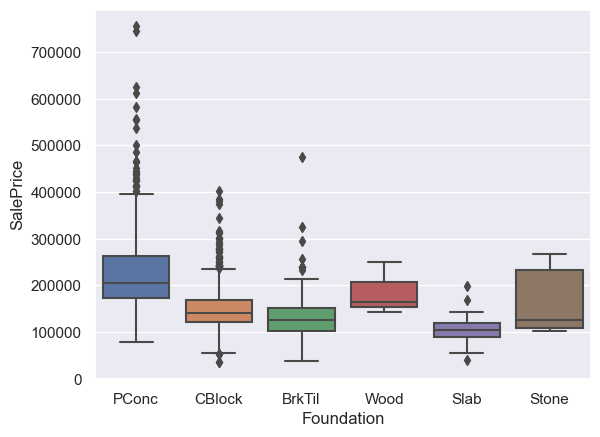

In [26]:
sns.boxplot(data=hf,x="Foundation",y="SalePrice")

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

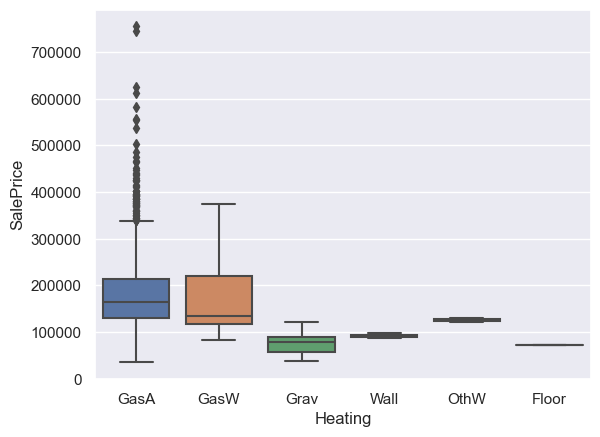

In [27]:
sns.boxplot(data=hf,x="Heating",y="SalePrice")

### Creating and joining dummy column with the actual dataset


In [28]:
dummy_col = pd.get_dummies(hf[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

hf = pd.concat([hf,dummy_col],axis='columns')

hf = hf.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

### Let us check the distribution of our target variable before scaling and Splitting


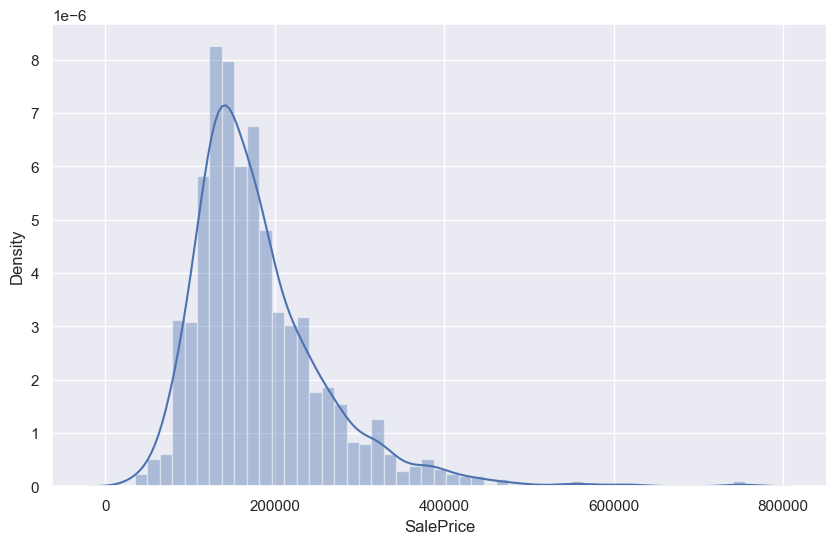

In [29]:
plt.figure(figsize=(10,6))
sns.distplot(hf.SalePrice)
plt.show()

### Creating train and test dataset for validation purpose


In [30]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(hf,train_size=0.7,test_size=0.3,random_state=69)

In [31]:
print(df_train.shape)
print(df_test.shape)

(1021, 198)
(438, 198)


### Scaling the train dataset


In [32]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

### Lets check the distribution again after scaling


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

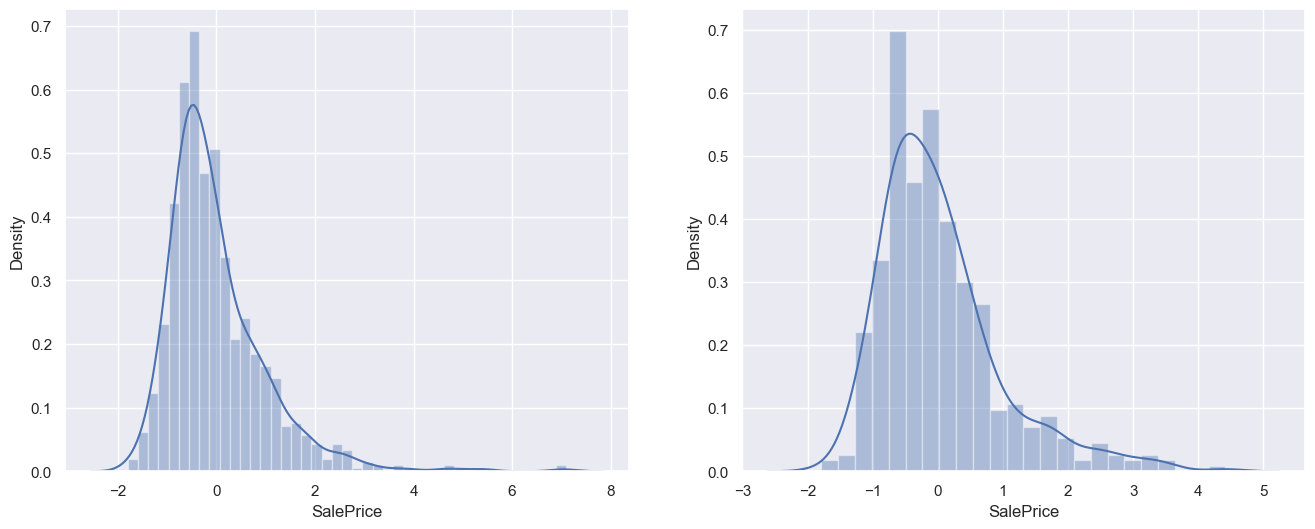

In [33]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

### Spliting the dependent and independent variable


In [34]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Now using RFE lets try to to find the optimal number of feature


In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE

lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [36]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']


In [37]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)


### Lets filter the train and test set for the RFE selected columns


In [38]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Lets try first with the Lasso regression model


In [39]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8605978382906689
0.8114742857852763


In [40]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -2.862),
 ('LotFrontage', -0.135),
 ('LotArea', 0.227),
 ('LotShape', 0.121),
 ('LandSlope', 0.143),
 ('OverallQual', 0.108),
 ('OverallCond', 0.068),
 ('YearBuilt', 0.014),
 ('YearRemodAdd', -0.007),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.094),
 ('BsmtQual', -0.028),
 ('BsmtCond', 0.421),
 ('BsmtExposure', 0.121),
 ('BsmtFinType1', 0.104),
 ('BsmtFinSF1', 0.135),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.076),
 ('BsmtUnfSF', 0.023),
 ('TotalBsmtSF', 0.072),
 ('HeatingQC', -0.108),
 ('CentralAir', 0.198),
 ('1stFlrSF', -0.042),
 ('2ndFlrSF', 0.369),
 ('LowQualFinSF', 0.333),
 ('GrLivArea', -0.05),
 ('BsmtFullBath', 0.159),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.141),
 ('TotRmsAbvGrd', -0.142),
 ('Fireplaces', 0.147),
 ('GarageYrBlt', 0.197),
 ('GarageFinish', -0.12),
 ('GarageCars', -0.204),
 ('GarageArea', 0.202),
 ('GarageQual', 0.143),
 ('GarageCond', 0.


### Now lets try to improve our model with the optimal value of alpha using GridSearchCV


In [41]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

folds = KFold(n_splits=10,shuffle=True,random_state=69)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=69, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [42]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.046533,0.016582,0.002404,0.001134,0.001,{'alpha': 0.001},0.894646,0.872585,0.782061,0.865577,...,0.875136,0.860557,0.866136,0.895498,0.857147,0.861145,0.858683,0.861528,0.865658,0.011060
1,0.008634,0.001658,0.002051,0.001038,0.010,{'alpha': 0.01},0.877513,0.893013,0.821848,0.858081,...,0.823544,0.821281,0.824609,0.870701,0.817462,0.823137,0.819781,0.822388,0.825923,0.015113
2,0.015483,0.002398,0.005431,0.002187,0.100,{'alpha': 0.1},0.823602,0.838165,0.771580,0.778292,...,0.755955,0.752581,0.761956,0.806772,0.745544,0.754882,0.748377,0.755285,0.758390,0.016687
3,0.011078,0.010444,0.003547,0.002369,1.000,{'alpha': 1.0},-0.006135,-0.014316,-0.000781,-0.001194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006001,0.003234,0.002697,0.002013,5.000,{'alpha': 5.0},-0.006135,-0.014316,-0.000781,-0.001194,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


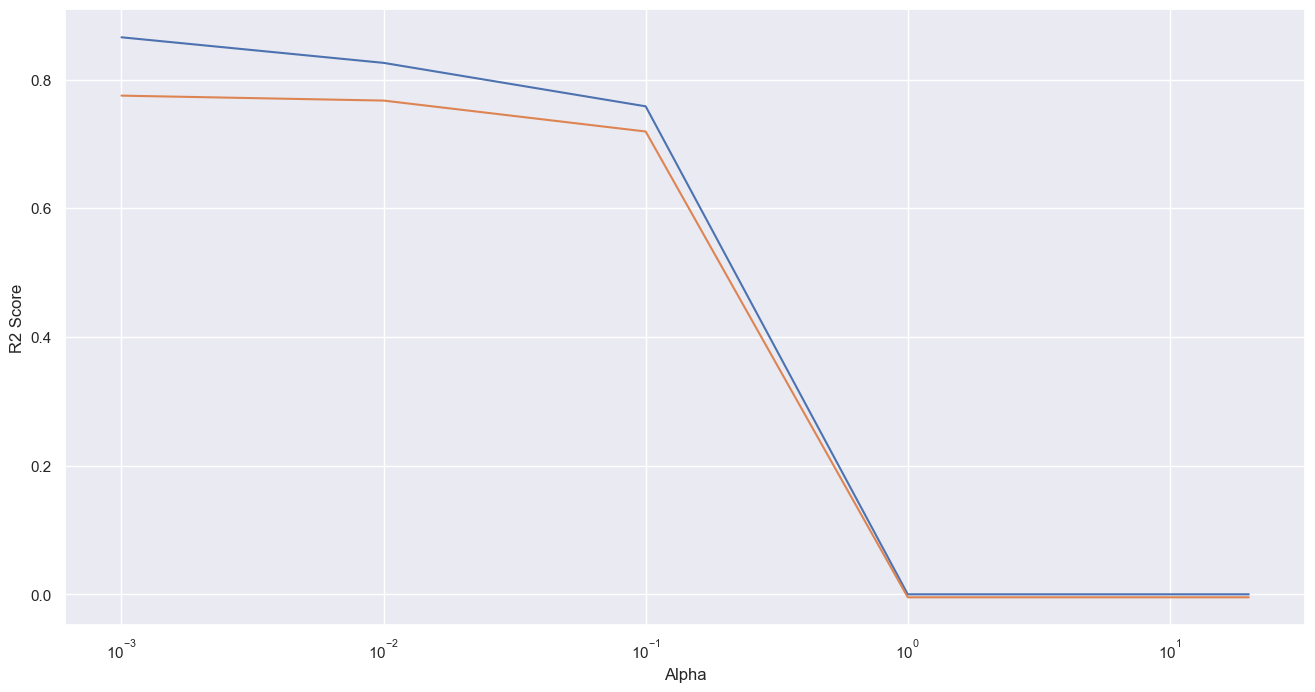

In [43]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [44]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [45]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8605978382906689
0.8114742857852763


In [46]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [47]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
46,ScreenPorch,1.669437
42,WoodDeckSF,0.688852
13,BsmtCond,0.421407
24,2ndFlrSF,0.368619
25,LowQualFinSF,0.332524
66,Neighborhood_CollgCr,0.244291
53,MSZoning_RL,0.229859
2,LotArea,0.226927
39,GarageArea,0.202223
44,EnclosedPorch,0.198190


## Now lets use the ridge regression


In [48]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9014151077274779
0.4329586482278588


#### As we can see the above alpha value is not optimal for ridge there are sign of overfitting the clear difference we can see in the train and test score

#### Now lets try to improve our model with the optimal value of alpha using GridSearchCV


In [49]:
folds  = KFold(n_splits=10,shuffle=True,random_state=69)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=69, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [50]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005780,0.000610,0.002270,0.001295,0.001,{'alpha': 0.001},0.896163,0.877811,0.097023,0.889078,...,0.904059,0.902087,0.906332,0.902995,0.899911,0.902387,0.900521,0.902108,0.902317,0.001786
1,0.005141,0.000818,0.001660,0.000833,0.010,{'alpha': 0.01},0.896323,0.879380,0.171633,0.889192,...,0.903905,0.901845,0.906090,0.902995,0.899666,0.902136,0.900284,0.901874,0.902108,0.001805
2,0.006202,0.002109,0.002287,0.000692,0.100,{'alpha': 0.1},0.895106,0.885164,0.545237,0.886011,...,0.897502,0.893489,0.897646,0.902971,0.891257,0.893503,0.892050,0.893771,0.894753,0.003417
3,0.015314,0.001208,0.005182,0.001655,0.200,{'alpha': 0.2},0.893605,0.886509,0.681833,0.882483,...,0.890439,0.885739,0.889745,0.902909,0.883503,0.885553,0.884398,0.886241,0.887802,0.005479
4,0.014219,0.003335,0.006226,0.002416,0.500,{'alpha': 0.5},0.892133,0.888101,0.792030,0.877375,...,0.878680,0.874491,0.878213,0.902593,0.872245,0.874078,0.873281,0.875279,0.877516,0.008607


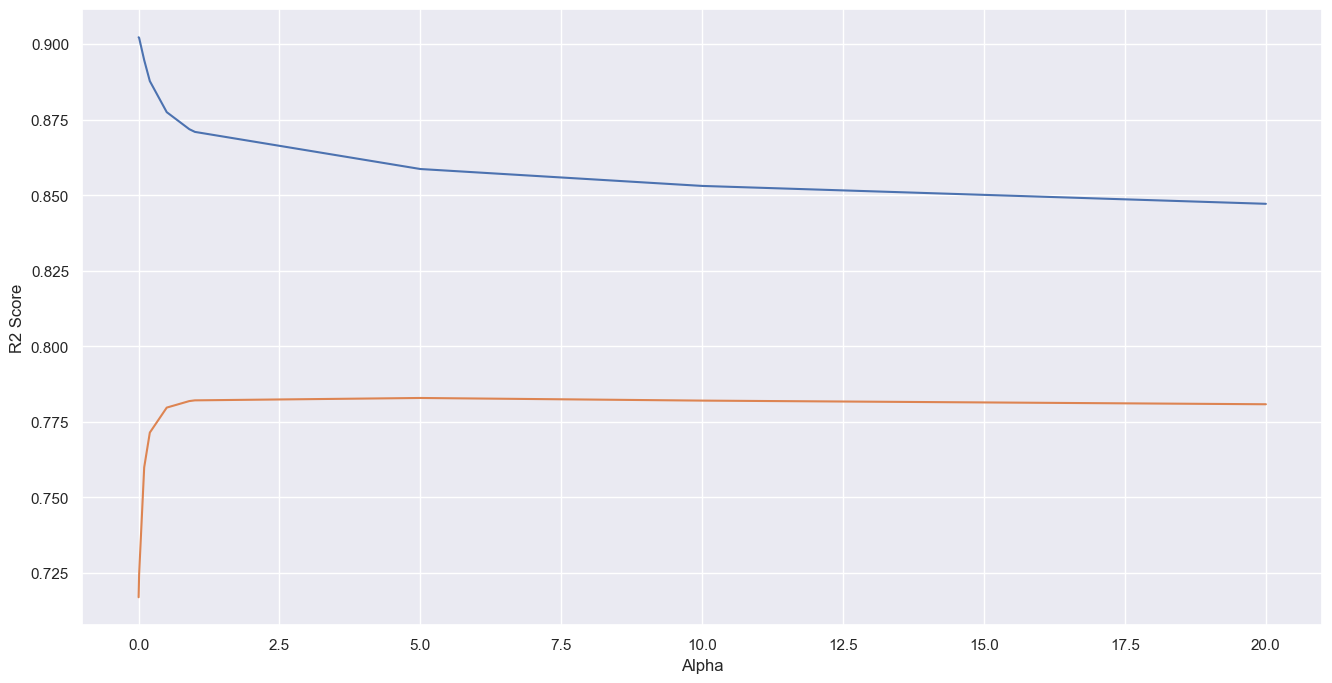

In [51]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### On the basis of above graph lets create the model


In [52]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [53]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8691439595932058
0.7977578007665737


In [54]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [55]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feature,Coef
46,ScreenPorch,1.810345
42,WoodDeckSF,1.029780
43,OpenPorchSF,0.714286
44,EnclosedPorch,0.572151
45,3SsnPorch,0.462392
25,LowQualFinSF,0.384825
16,BsmtFinSF1,0.378074
24,2ndFlrSF,0.377115
39,GarageArea,0.360853
66,Neighborhood_CollgCr,0.344238


In [57]:
ridge_coef.Feature

0               MSSubClass
1              LotFrontage
2                  LotArea
3                 LotShape
4                LandSlope
              ...         
66    Neighborhood_CollgCr
67    Neighborhood_Crawfor
68    Neighborhood_Edwards
69    Neighborhood_Gilbert
70     Neighborhood_IDOTRR
Name: Feature, Length: 71, dtype: object

### After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but as lasso will penalize more on the dataset and can also help in feature elemination i am goint to consider that as my final model.

## Final Model


In [58]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8605978382906689
0.8114742857852763


### After compairing both the model we can see that the below Features are best explaining the DataSet


#### MiscVal      
#### BsmtHalfBath 
#### LowQualFinSF 
#### BsmtFullBath 
#### HalfBath    

### Best alpha value for Lasso : {alpha: 0.001}
### Best alpha value for Ridge : {alpha: 1.0}